<a href="https://colab.research.google.com/github/Samtechies/Premier-League-2024-Analysis/blob/main/PL_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('/content/PremierLeagueSeason2024.csv')

### **DATA EXPLORATION**

In [8]:
df

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5
5,Tottenham Hotspur,142,106,38,14,24,128,36,6
6,Aston Villa,131,107,36,15,25,123,24,7
7,West Ham United,122,121,33,18,25,117,1,8
8,Everton,87,99,30,17,29,107,-12,9
9,Newcastle United,131,124,30,15,31,105,7,10


In [9]:
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


**Checking for missing values**

In [10]:
df.isnull().sum()

,0
team,0
goals_scored,0
goals_conceded,0
wins,0
draws,0
losses,0
points,0
goal_difference,0
rank,0


-  No missing values

**Summary Statistics**

In [11]:
df.describe()

,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,94.583333,94.583333,24.791667,13.750000,24.791667,88.125000,0.000000,12.500000
std,41.041778,29.057539,13.931444,5.358861,10.794440,44.184704,47.120567,7.071068
min,35.000000,50.000000,5.000000,5.000000,9.000000,26.000000,-112.000000,1.000000
25%,55.750000,67.750000,12.750000,9.000000,18.750000,46.750000,-27.250000,6.750000
50%,86.500000,99.000000,23.000000,14.500000,23.000000,90.000000,-10.500000,12.500000
75%,131.000000,114.750000,36.250000,18.000000,29.500000,124.250000,25.000000,18.250000
max,179.000000,167.000000,55.000000,26.000000,57.000000,177.000000,113.000000,24.000000


**Data Cleaning**

In [12]:
df.dtypes

,0
team,object
goals_scored,int64
goals_conceded,int64
wins,int64
draws,int64
losses,int64
points,int64
goal_difference,int64
rank,int64


**Feature Engineering**

- Win Rate Metrics

In [17]:
df['win_rate'] = df['wins'] / (df['wins'] + df['draws'] + df['losses'])

In [20]:
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,win_rate
0,Manchester City,179,66,55,12,9,177,113,1,0.723684
1,Liverpool,154,83,44,19,13,151,71,2,0.578947
2,Arsenal,146,68,46,12,18,150,78,3,0.605263
3,Manchester United,130,102,39,17,20,134,28,4,0.513158
4,Chelsea,135,99,37,19,20,130,36,5,0.486842


- Loss Rate Metrics

In [21]:
df['loss_rate'] = df['losses'] / (df['wins'] + df['draws'] + df['losses'])

In [22]:
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,win_rate,loss_rate
0,Manchester City,179,66,55,12,9,177,113,1,0.723684,0.118421
1,Liverpool,154,83,44,19,13,151,71,2,0.578947,0.171053
2,Arsenal,146,68,46,12,18,150,78,3,0.605263,0.236842
3,Manchester United,130,102,39,17,20,134,28,4,0.513158,0.263158
4,Chelsea,135,99,37,19,20,130,36,5,0.486842,0.263158


### **EXPLORATORY DATA ANALYSIS(EDA)**

- **Distribution of Goals Scored and Goals Conceded:**

Histogram - Goals Scored

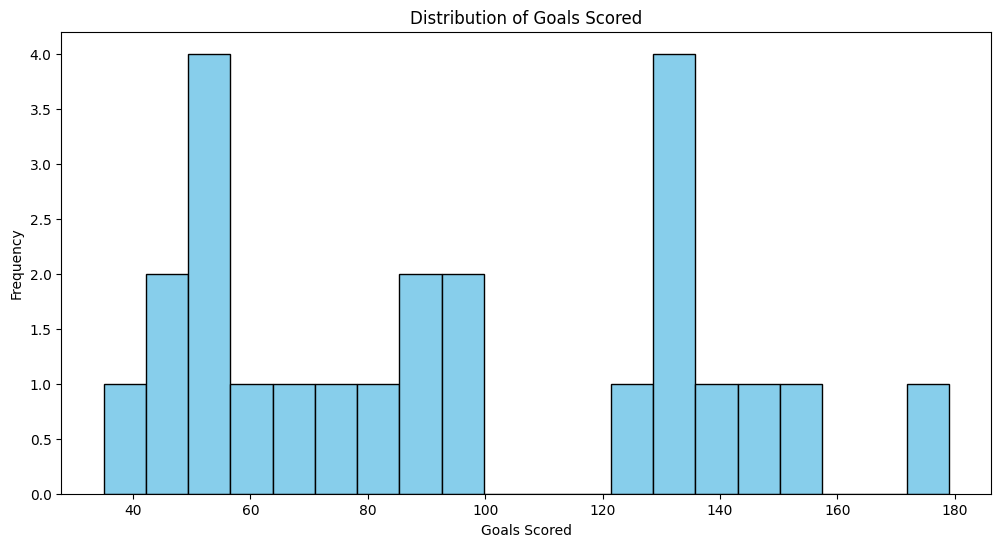

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(df['goals_scored'],  bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()

- **Goal Difference Analysis:**

In [32]:
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,win_rate,loss_rate
0,Manchester City,179,66,55,12,9,177,113,1,0.723684,0.118421
1,Liverpool,154,83,44,19,13,151,71,2,0.578947,0.171053
2,Arsenal,146,68,46,12,18,150,78,3,0.605263,0.236842
3,Manchester United,130,102,39,17,20,134,28,4,0.513158,0.263158
4,Chelsea,135,99,37,19,20,130,36,5,0.486842,0.263158


Text(0, 0.5, 'Goal Difference')

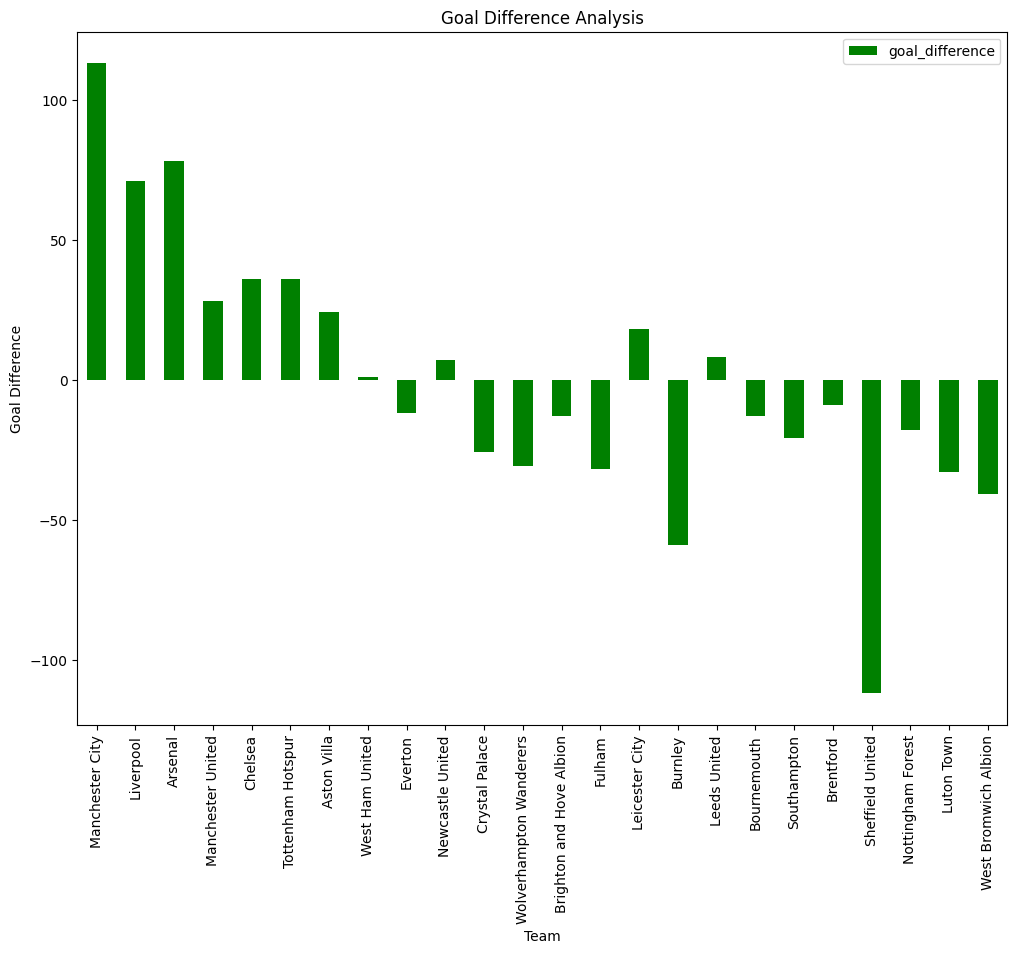

In [28]:
df.plot(kind='bar', figsize=(12, 9), x='team', y='goal_difference', color='green')
plt.title('Goal Difference Analysis')
plt.xlabel('Team')
plt.ylabel('Goal Difference')

- **Team Performance Analysis by Rank:**

Analyzing Team from the highest to the lowest-performing teams:

In [36]:
top_teams = df.sort_values(by='rank').head(5)

In [37]:
top_teams

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank,win_rate,loss_rate
0,Manchester City,179,66,55,12,9,177,113,1,0.723684,0.118421
1,Liverpool,154,83,44,19,13,151,71,2,0.578947,0.171053
2,Arsenal,146,68,46,12,18,150,78,3,0.605263,0.236842
3,Manchester United,130,102,39,17,20,134,28,4,0.513158,0.263158
4,Chelsea,135,99,37,19,20,130,36,5,0.486842,0.263158


- **Correlation Matrix**

Relationship between metrics like goals scored, goals conceded, and points.

<Axes: >

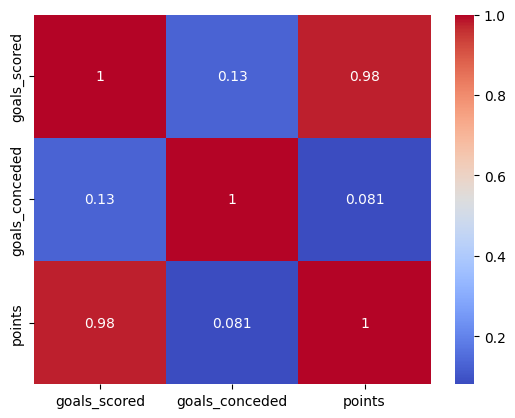

In [39]:
selected_columns = ['goals_scored', 'goals_conceded', 'points']
selected_df = df[selected_columns]

# Heatmap
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')

### **COMPARING WINS, DRAWS AND LOSSES**

<Axes: xlabel='team'>

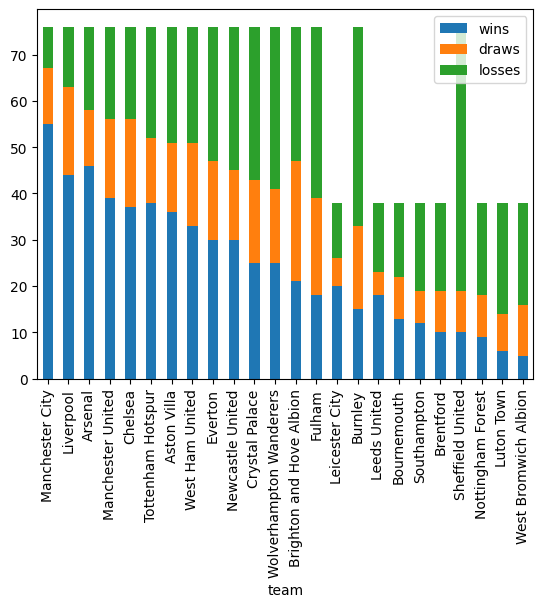

In [40]:
df.set_index('team')[['wins', 'draws', 'losses']].plot(kind='bar', stacked=True)

### **INSIGHTS AND SUMMARY**

- **Best Defensive Record**

In [41]:
best_defensive_team = df[df['goals_conceded'] == df['goals_conceded'].min()]
print("Best Defensive Team:")
print(best_defensive_team[['team', 'goals_conceded']])


Best Defensive Team:
              team  goals_conceded
14  Leicester City              50


Leicester City is the best defensive team with a total of 50 goals conceded.

- **Highest Win Rate**

In [42]:
df['win_rate'] = df['wins'] / (df['wins'] + df['draws'] + df['losses'])
highest_win_rate_team = df[df['win_rate'] == df['win_rate'].max()]
print("Team with the Highest Win Rate:")
print(highest_win_rate_team[['team', 'win_rate']])


Team with the Highest Win Rate:
              team  win_rate
0  Manchester City  0.723684


Manchester City has the highest win rate of 72%

- **Largest Goal Difference**

In [43]:
df['goal_difference'] = df['goals_scored'] - df['goals_conceded']
largest_goal_difference_team = df[df['goal_difference'] == df['goal_difference'].max()]
print("Team with the Largest Goal Difference:")
print(largest_goal_difference_team[['team', 'goal_difference']])


Team with the Largest Goal Difference:
              team  goal_difference
0  Manchester City              113


Manchester City has the Largest Goal difference of (+113)

### **COMBINED INSIGHTS**

In [44]:
summary = {
    "Best Defensive Team": best_defensive_team['team'].values[0],
    "Fewest Goals Conceded": best_defensive_team['goals_conceded'].values[0],
    "Team with Highest Win Rate": highest_win_rate_team['team'].values[0],
    "Highest Win Rate": highest_win_rate_team['win_rate'].values[0],
    "Team with Largest Goal Difference": largest_goal_difference_team['team'].values[0],
    "Largest Goal Difference": largest_goal_difference_team['goal_difference'].values[0],
}

print("Summary of Insights:")
print(summary)


Summary of Insights:
{'Best Defensive Team': 'Leicester City', 'Fewest Goals Conceded': 50, 'Team with Highest Win Rate': 'Manchester City', 'Highest Win Rate': 0.7236842105263158, 'Team with Largest Goal Difference': 'Manchester City', 'Largest Goal Difference': 113}
